# Worksheet 16

Name:  
UID: 

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

KeyboardInterrupt: 

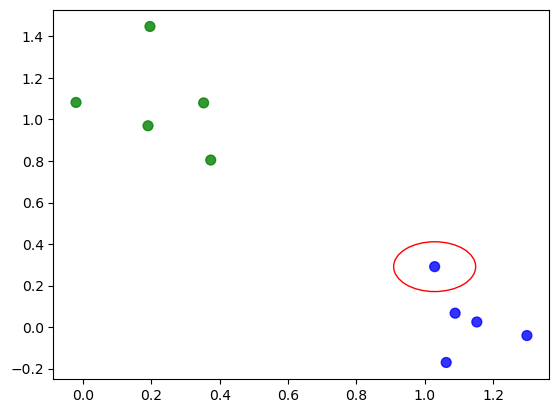

In [17]:
''' 
a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$
'''

import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    result = 0
    for i in range(len(alpha_i)):
        result += alpha_i[i] * np.dot(X[i], x)
    result += b
    return result


images = []
for _ in range(epochs):
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    prediction = predict(alpha_i, b, x)
    if y * prediction <= 0:
        error = True
        alpha_i[i] += learning_rate * y
        b += learning_rate * y
    
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [5]:
def linear_kernel(x, y):
    return np.dot(x, y)

def polynomial_kernel(x, y, degree=3):
    return (np.dot(x, y) + 1) ** degree

def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))

In [6]:
import numpy as np

def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n



def rbf_kernel(x, y, gamma=1.0):
    # If x and y are 1D arrays, convert them to column vectors
    if x.ndim == 1:
        x = x[:, np.newaxis]
    if y.ndim == 1:
        y = y[:, np.newaxis]
    
    # Compute pairwise squared Euclidean distances
    pairwise_sq_dists = np.sum((x[:, np.newaxis, :] - y[np.newaxis, :, :]) ** 2, axis=-1)
    
    # Compute the RBF kernel matrix
    kernel_matrix = np.exp(-gamma * pairwise_sq_dists)
    
    return kernel_matrix


b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

Decrease it, the higher the degree of the polynomial, the more curves and the more overfitting

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

If the model is underfitting, it implies that the decision boundary is too rigid and not capturing the underlying patterns in the data effectively. Increasing the value of sigma will widen the Gaussian kernel, allowing more data points to influence the decision boundary. This increased flexibility can help the model better capture complex relationships in the data.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im
import sklearn.datasets as datasets



TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 50
learning_rate = .04
expanding_rate = .99
retracting_rate = 1.1
gamma = 0.00001 #### was unable to figure this out in time to submit

data = np.loadtxt("spiral.data")
X, y = data[:, :2], data[:, 2]

alpha_i = np.zeros((len(X),))
b = 0
def rbf_kernel(x, y, gamma=gamma):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)
    
def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    # Define colors
    olors = ['g' if label == 1 else 'b' for label in y]
    ax.scatter(X[:,0],X[:,1],color=olors, s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    result = 0
    for i in range(len(alpha_i)):
        result += alpha_i[i] * rbf_kernel(X[i], x)
    result += b
    return result

# Train SVM
for _ in range(epochs):
    i = np.random.randint(0, len(X))
    error = False
    x, yi = X[i], y[i]  
    
    prediction = predict(alpha_i, b, x)
    if yi * prediction <= 0:  
        error = True
        alpha_i[i] += learning_rate * yi  
        b += learning_rate * yi  

# Visualize final SVM
snap(X[0], alpha_i, b, False).show()





In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a range of gamma values to search
param_grid = {'gamma': [0.00001, 0.001, 0.01, 0.1, 1, 10]}

# Create a grid search object
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best gamma value
best_gamma = grid_search.best_params_['gamma']
print("Best gamma:", best_gamma)



Best gamma: 1e-05
